In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

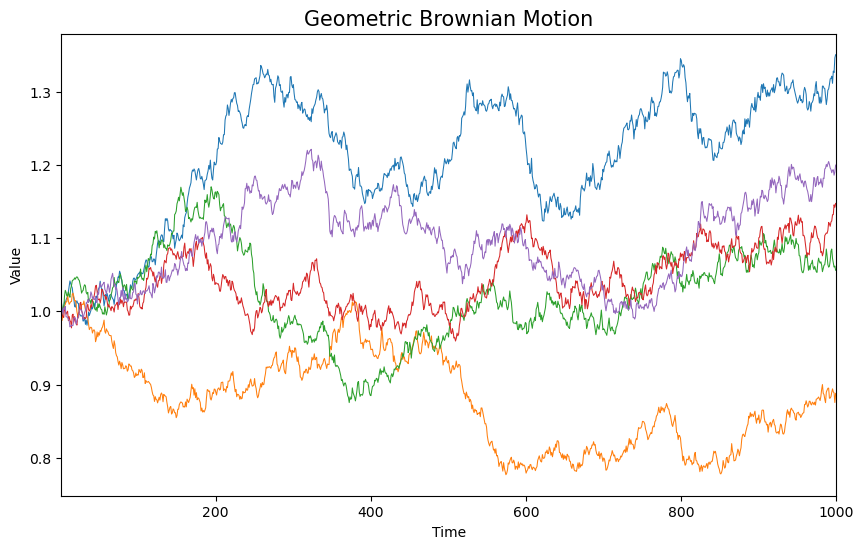

In [3]:
# SIMULATED GEOMETRIC BROWNIAN MOTION
S0 = 1
mu = 0.1 
sigma = 0.2 
T = 1 

I = 5 #No. simulations
i = 1000 #No. timesteps
dt = T/i
S = np.zeros((i,I))
S[0] = S0

#Xt = X0exp[(µ− 12σ2)t+σWt] - P24 of course PDF
for t in range(1,i):
    S[t] = S[t-1] * np.exp((mu-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*np.random.standard_normal(I))
    
plt.figure(figsize=(10,6))
plt.xlim(S0,i)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Geometric Brownian Motion", size=15)
plt.plot(S[:,:], linewidth=0.75)
plt.show()

Maximum absolute variation for dt = 1/10: 4.775
Minimum absolute variation for dt = 1/10: 1.019

Maximum absolute variation for dt = 1/100: 9.677
Minimum absolute variation for dt = 1/100: 5.957

Maximum absolute variation for dt = 1/1000: 27.603
Minimum absolute variation for dt = 1/1000: 23.199

Maximum absolute variation for dt = 1/10000: 82.419
Minimum absolute variation for dt = 1/10000: 77.858



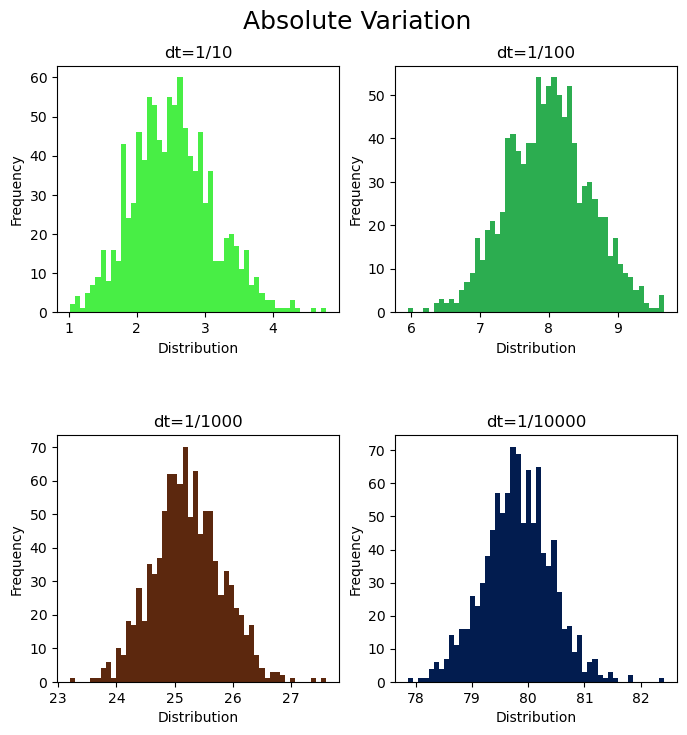

In [14]:
# Theorem 3.2. The value at time t of the quadratic variation process of Brownian motion is t - P38 PDF
# (Levy’s Theorem) A continuous martingale is a Brownian motion if and only if its quadratic
# variation over each interval [0, t] is equal to t

# ABSOLUTE VARIATION
T = 1
N = [10,100,1000, 10000]
simulations = []
for i in N:
    dt = T/i

    # Generate 1000 simulations of the Wiener increments, sqrt(dt) to normalise (rescale) to dt 
    dW = np.sqrt(dt) * np.random.normal(size=(i,1000))
# process of transferring continuous functions, models, variables, and equations into discrete counterparts.
    
    
    # Compute the absolute  variation of each simulation
    quad_var = np.sum(np.abs(dW), axis=0)
    df = pd.DataFrame(quad_var)
    simulations.append(df)

    # Check that the maximum and minimum values of variation are finite
    print(f"Maximum absolute variation for dt = 1/{i}: {np.max(quad_var):.3f}")
    print(f"Minimum absolute variation for dt = 1/{i}: {np.min(quad_var):.3f}\n")

dims = int(len(N)/2)
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Absolute Variation", fontsize=18, y=0.95)

for n in range(1,len(simulations)+1):
    ax = plt.subplot(dims, dims, n)
    simulations[n-1].plot(ax=ax, kind="hist", color= np.random.rand(3,), bins=50)

    ax.set_title(f"dt=1/{N[n-1]}")
    ax.get_legend().remove()
    ax.set_xlabel("Distribution")

plt.show()
#TENDS TO INFINITY AS N TENDS TO INFINITY

Maximum squared quadratic variation for dt = 1/10: 2.816
Minimum squared quadratic variation for dt = 1/10: 0.102

Maximum squared quadratic variation for dt = 1/100: 1.421
Minimum squared quadratic variation for dt = 1/100: 0.621

Maximum squared quadratic variation for dt = 1/1000: 1.171
Minimum squared quadratic variation for dt = 1/1000: 0.832

Maximum squared quadratic variation for dt = 1/10000: 1.039
Minimum squared quadratic variation for dt = 1/10000: 0.944



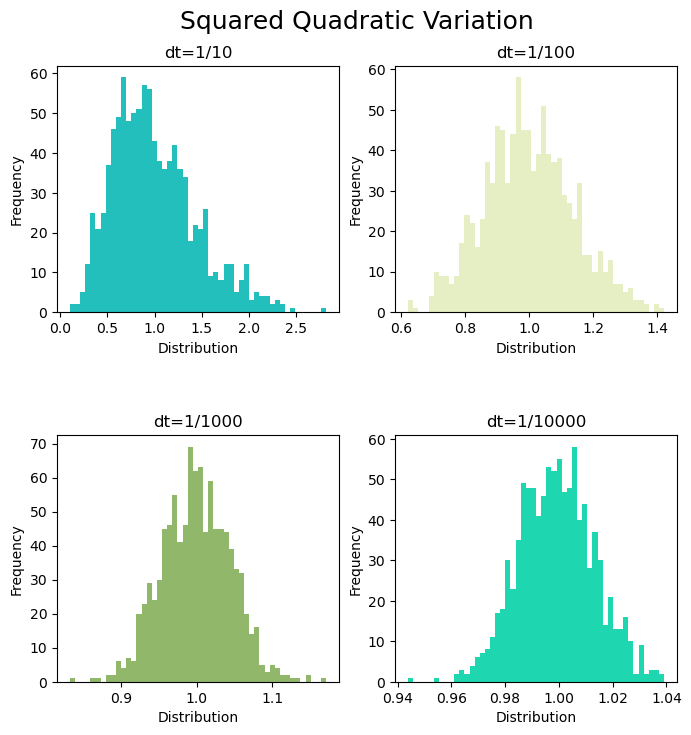

In [15]:
# SQUARED QUADRATIC VARIATION
T = 1
N = [10, 100, 1000, 10000]
simulations = []
for i in N:
    dt = T/i

    # Generate 1000 simulations of the Wiener process
    dW = np.sqrt(dt) * np.random.normal(size=(i,1000))

    # Compute the squared quadratic variation of each simulation
    quad_var = np.sum(np.square(dW), axis=0)
    df = pd.DataFrame(quad_var)
    simulations.append(df)
    
    # Check that the maximum and minimum values of variation are finite
    print(f"Maximum squared quadratic variation for dt = 1/{i}: {np.max(quad_var):.3f}")
    print(f"Minimum squared quadratic variation for dt = 1/{i}: {np.min(quad_var):.3f}\n")
    
dims = int(len(N)/2)
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Squared Quadratic Variation", fontsize=18, y=0.95)

for n in range(1,len(simulations)+1):
    ax = plt.subplot(dims, dims, n)
    simulations[n-1].plot(ax=ax, kind="hist", color= np.random.rand(3,), bins=50)

    ax.set_title(f"dt=1/{N[n-1]}")
    ax.get_legend().remove()
    ax.set_xlabel("Distribution")

plt.show()
# TENDS TO T (1) AS N TENDS TO INFINITY

Maximum absolute variation for dt = exp(1/10): 1.718
Minimum absolute variation for dt = exp(1/10): 1.718

Maximum absolute variation for dt = exp(1/100): 1.718
Minimum absolute variation for dt = exp(1/100): 1.718

Maximum absolute variation for dt = exp(1/1000): 1.718
Minimum absolute variation for dt = exp(1/1000): 1.718

Maximum absolute variation for dt = exp(1/10000): 1.718
Minimum absolute variation for dt = exp(1/10000): 1.718



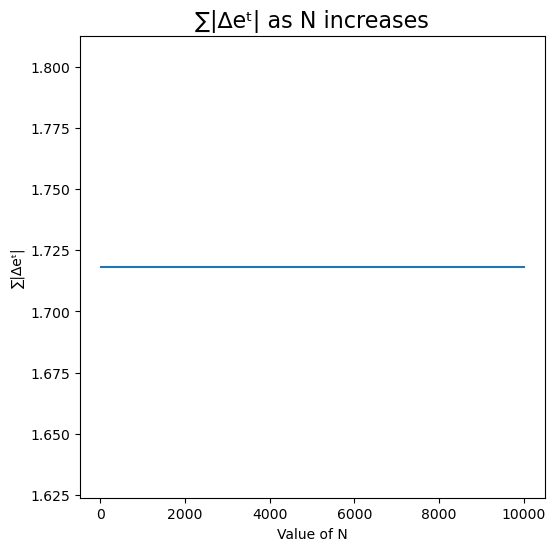

In [20]:
# ABSOLUTE VARIATION - EXPONENTIAL
T = 1
N = [10,100,1000,10000]
simulations = []
for i in N:
    dt = T/i
    arr = np.linspace(0, T, i)
    count = 0
    
    for t in arr:
        t = math.exp(t)
        arr[count] = t
        count += 1
    quad_var = np.sum(np.diff(np.abs(arr),axis=0), axis=0)
    simulations.append(quad_var)
    print(f"Maximum absolute variation for dt = exp(1/{i}): {np.max(quad_var):.3f}")
    print(f"Minimum absolute variation for dt = exp(1/{i}): {np.min(quad_var):.3f}\n")

plt.figure(figsize=(6, 6))
plt.xlabel("Value of N")
plt.ylabel("∑|∆eᵗ|")
plt.title("∑|∆eᵗ| as N increases", size = 16)
plt.plot(N, simulations)
plt.show()
#Variation constant at 1.7 therefore bounded

Maximum squared quadratic variation for dt = exp(1/10): 0.710
Minimum squared quadratic variation for dt = exp(1/10): 0.710

Maximum squared quadratic variation for dt = exp(1/100): 0.065
Minimum squared quadratic variation for dt = exp(1/100): 0.065

Maximum squared quadratic variation for dt = exp(1/1000): 0.006
Minimum squared quadratic variation for dt = exp(1/1000): 0.006

Maximum squared quadratic variation for dt = exp(1/10000): 0.001
Minimum squared quadratic variation for dt = exp(1/10000): 0.001



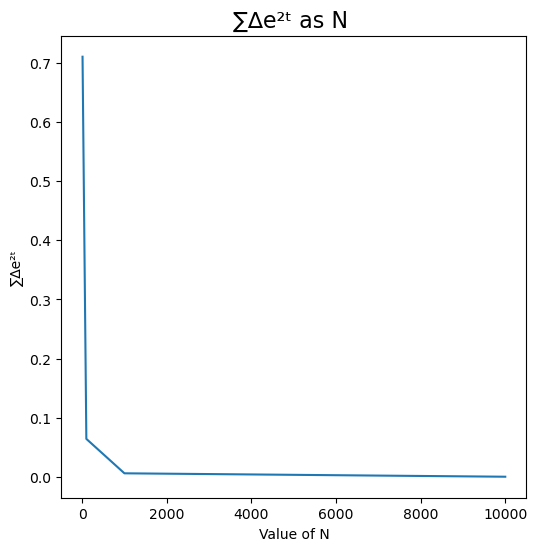

In [17]:
# SQUARED QUADRATIC VARIATION - EXPONENTIAL
T = 1
N = [10,100,1000,10000]
simulations = []
for i in N:
    dt = T/i
    arr = np.linspace(0, T, i)
    count = 0
    
    for t in arr:
        t = math.exp(t)
        arr[count] = t
        count += 1
    quad_var = np.average(np.diff(np.square(arr),axis=0), axis=0)
    simulations.append(quad_var)
    print(f"Maximum squared quadratic variation for dt = exp(1/{i}): {np.max(quad_var):.3f}")
    print(f"Minimum squared quadratic variation for dt = exp(1/{i}): {np.min(quad_var):.3f}\n")

plt.figure(figsize=(6, 6))
plt.xlabel("Value of N")
plt.ylabel("∑∆e²ᵗ")
plt.title("∑∆e²ᵗ as N ", size = 16)
plt.plot(N, simulations)
plt.show()